In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from scipy import stats
np.set_printoptions(precision=3, suppress=True)

In [5]:
# Load dữ liệu: data-example/example_sales_vn.csv
file_path = "data/supermarket_sales_vn.csv"
df_total = pd.read_csv(file_path, usecols=['Total'])

In [10]:
mean = np.mean(df_total['Total'])
median = np.median(df_total)
print(mean)
print(median)

322.96674900000005
253.848


## Khuynh hướng tập trung

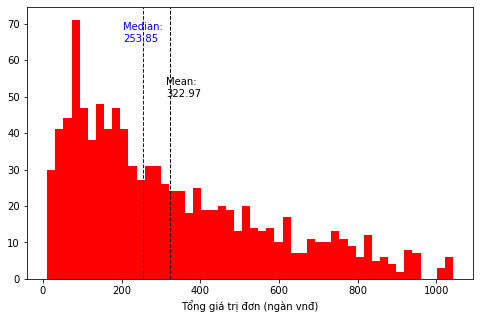

In [11]:
fig, ax = plt.subplots(figsize=(8,5), num=1)
ax.hist(df_total, bins=50, color='red')
ax.set_xlabel("Tổng giá trị đơn (ngàn vnđ)")

ax.axvline(mean, color='k', linestyle='dashed', linewidth=1)
ax.text(mean-10, 50, f"Mean:\n{mean:.2f}", color="k")
#ax.text(mean, 60, 'Mean: %f'%(mean))

ax.axvline(median, color='b', linestyle='dashed', linewidth=1)
ax.text(median-50, 65, f"Median:\n{median:.2f}", color="b")

plt.show()

## 1. Thử chọn random một số dữ liệu

In [37]:
n = np.random.randint(50,100)
sample = np.random.choice(df_total['Total'], n)
np.mean(sample)

302.39115

## 2. Chọn nhiều mẫu random và tính mean của mỗi mẫu

In [38]:
s_means = []
for i in range(1000):
    n = np.random.randint(50,100)
    sample = np.random.choice(df_total['Total'], n)
    s_means.append(np.mean(sample))

In [64]:
# Convert sang Numpy array
s_means = np.array(s_means)

In [48]:
s_means.mean(), s_means.std()

(322.3227912169585, 28.797773917127653)

In [54]:
s_means.min(), s_means.max()

(224.49082352941178, 422.2755833333333)

## 3. Vẽ biểu đồ phân bố 

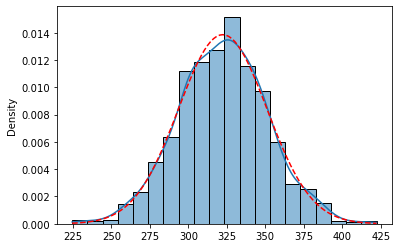

In [62]:
ax = sns.histplot(s_means, bins=20, kde=True, stat='density')

x_pdf = np.linspace(s_means.min(), s_means.max(), 100)
y_pdf = stats.norm.pdf(x_pdf, s_means.mean(), s_means.std())
ax.plot(x_pdf, y_pdf, color='r', linestyle='--')

plt.show()